In [1]:
import os
os.chdir('D://scratch_backup//perl//jdftx_mod_test//HF//HF_sicko_mode//more_bands')
import sys
sys.path.append('C://Users//User//PycharmProjects//Musgrave_scripts//BenRich//common_funcs//')
import numpy as np
import jdftxfuncs as jfunc
import cohpfuncs as cfunc
import plotfuncs as pfunc
import matplotlib.pyplot as plt

In [2]:
savename='example_plot.png'
bandfile='HF.bandProjections'
gvecfile='HF.Gvectors'
eigfile='HF.eigenvals'
outfile='HF.out'
#S, R, mu = jfunc.get_vars(outfile)
proj, nStates, nBands, nProj, nOrbsPerAtom, wk, k_points, E = cfunc.parse_data(bandfile, gvecfile, eigfile, guts=False)
T_ijk, P_uvjk, e_jk = cfunc.prepare_small_funcs(proj, E)
pCOHP_uv, pCOHP_uv_u, H_atomic_matrix = cfunc.prepare_large_funcs(e_jk,P_uvjk,nBands,nStates,wk,k_points,guts=False,docuprint=True)

pCOHP_uv(orb u index, orb v index, Egrid, Emin, Emax, dE) -> pCOHP_uv(E) array


In [3]:
Emin = np.min(E)
Emax = np.max(E)
dE = 0.0001
Emax, Emin = cfunc.adjust_Ebounds(Emin, Emax, dE)
Egrid = np.arange(Emin, Emax, dE)
orbs_dict = cfunc.orbs_idx_dict(outfile, nOrbsPerAtom)

In [4]:
orbs_dict.keys()

dict_keys(['H #1', 'F #1'])

In [5]:
HF_COHP = pfunc.ez_pCOHP_sum(orbs_dict['H #1'], orbs_dict['F #1'], Egrid, Emin, Emax, dE, pCOHP_uv)
HF_COHP_int = pfunc.get_integrated_array(HF_COHP, dE)

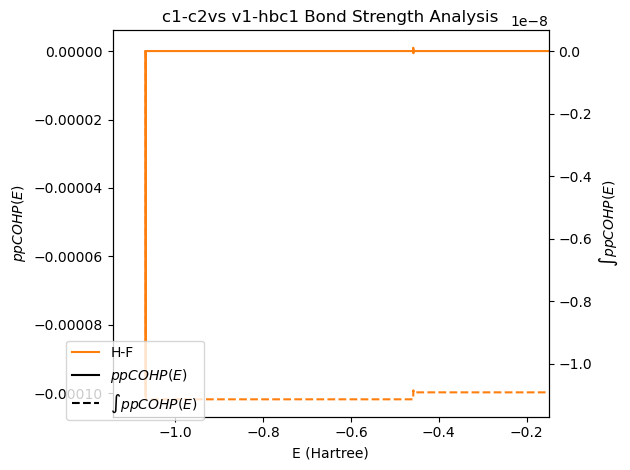

In [6]:
fig, ax = plt.subplots()
ax.plot(Egrid, HF_COHP, color='C1', label='H-F')
ax.set_xlabel('E (Hartree)')
ax.set_ylabel(r'$ppCOHP(E)$')
axint = ax.twinx()
axint.plot(Egrid, HF_COHP_int, color='C1', linestyle='--')
axint.set_ylabel(r'$\int ppCOHP(E)$')
line1 = ax.plot(0,0,color='black',label=r'$ppCOHP(E)$',linestyle='solid')
line2 = axint.plot(0,0,color='black',label=r'$\int ppCOHP(E)$',linestyle='--')

pfunc.align_yaxis(ax, axint)
#plt.axvline(x=0.0, color='r', label=r'$\mu$', linestyle='dotted')
plt.title('c1-c2vs v1-hbc1 Bond Strength Analysis')
plt.xlim(xmax = -0.15)


fig.legend(loc='lower left', bbox_to_anchor=(0.1, 0.1))
fig.tight_layout()